<a href="https://colab.research.google.com/github/fazalpge/product_forecasting/blob/main/Prophet_Time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install prophet

Import Libraries

In [2]:
import pandas as pd
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

Read DataSet

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/fazalpge/product_forecasting/main/Inventory%20Data_fazal.csv')



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionDate          1807 non-null   object 
 1   Location                 1807 non-null   object 
 2   ItemName                 1807 non-null   object 
 3   Cost                     1807 non-null   int64  
 4   SaleQty                  1807 non-null   int64  
 5   SaleBonusQty             1807 non-null   int64  
 6   SaleTotalQty             1807 non-null   int64  
 7   MRP                      1807 non-null   int64  
 8   SaleAmount               1807 non-null   int64  
 9   PerInvoiceAverageAmount  1807 non-null   float64
dtypes: float64(1), int64(6), object(3)
memory usage: 141.3+ KB


In [5]:
df.head()

,TransactionDate,Location,ItemName,Cost,SaleQty,SaleBonusQty,SaleTotalQty,MRP,SaleAmount,PerInvoiceAverageAmount
0,25-Oct-23,Brahmaputra,Clean 100ml,250,50,4,54,940,47000,44439.81
1,25-Oct-23,Brahmaputra,Clean 100ml,250,10,0,10,940,9400,12013.21
2,22-Oct-23,Brahmaputra,Clean 100ml,250,20,1,21,940,18800,92327.94
3,21-Oct-23,Brahmaputra,Clean 100ml,250,6,0,6,940,5640,16732.52
4,19-Oct-23,Brahmaputra,Clean 100ml,250,20,1,21,940,18800,11170.89


In [6]:
df=df[["TransactionDate","SaleQty"]]
df.head()

,TransactionDate,SaleQty
0,25-Oct-23,50
1,25-Oct-23,10
2,22-Oct-23,20
3,21-Oct-23,6
4,19-Oct-23,20


# Change Column Names for FB Prophet

In [7]:
df.columns = ['ds','y']

In [8]:
df['ds'] = pd.to_datetime(df['ds'])
df.tail()

<ipython-input-8-df3eb660f625>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ds'] = pd.to_datetime(df['ds'])
<ipython-input-8-df3eb660f625>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds'] = pd.to_datetime(df['ds'])


,ds,y
1802,2022-04-23,60
1803,2022-11-24,0
1804,2022-04-23,20
1805,2022-04-22,28
1806,2022-04-22,60


# Plot Your Data

<Axes: xlabel='ds'>

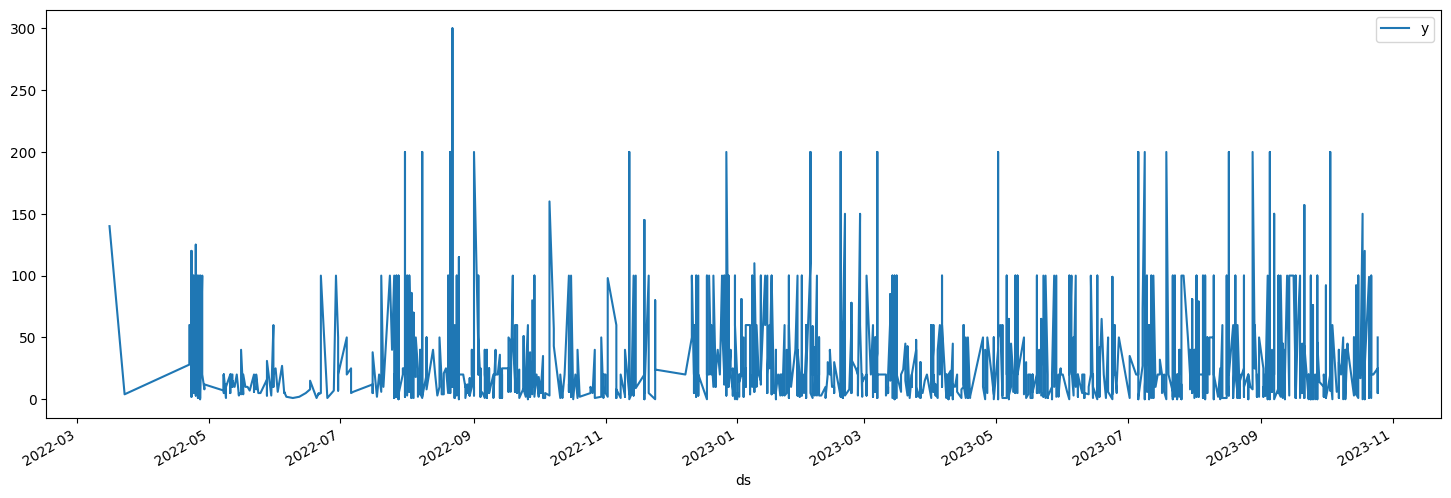

In [9]:
df.plot(x='ds',y='y',figsize=(18,6))

In [10]:
len(df)

1807

# Train, Test Split

In [11]:
train = df.iloc[:len(df)-365]
test = df.iloc[len(df)-365:]

# Start Making Predictions

In [12]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=365) #MS for monthly, H for hourly
forecast = m.predict(future)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvx36f2df/t2q8f9qd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvx36f2df/wacag0xm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89611', 'data', 'file=/tmp/tmpvx36f2df/t2q8f9qd.json', 'init=/tmp/tmpvx36f2df/wacag0xm.json', 'output', 'file=/tmp/tmpvx36f2df/prophet_modelimv42ct9/prophet_model-20240602042700.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:27:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:27:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [13]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
733,2024-10-20,25.125487,-18.368521,71.453774,25.046728,25.201909,1.930269,1.930269,1.930269,1.930269,1.930269,1.930269,0.0,0.0,0.0,27.055756
734,2024-10-21,25.122448,-14.870838,72.997093,25.043183,25.199552,2.506036,2.506036,2.506036,2.506036,2.506036,2.506036,0.0,0.0,0.0,27.628485
735,2024-10-22,25.119410,-21.817974,68.828948,25.039940,25.196816,0.847268,0.847268,0.847268,0.847268,0.847268,0.847268,0.0,0.0,0.0,25.966677
736,2024-10-23,25.116371,-17.841232,67.841734,25.036697,25.194051,0.648403,0.648403,0.648403,0.648403,0.648403,0.648403,0.0,0.0,0.0,25.764773
737,2024-10-24,25.113332,-17.545023,75.044663,25.033455,25.191334,2.231610,2.231610,2.231610,2.231610,2.231610,2.231610,0.0,0.0,0.0,27.344942


In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
733,2024-10-20,27.055756,-18.368521,71.453774
734,2024-10-21,27.628485,-14.870838,72.997093
735,2024-10-22,25.966677,-21.817974,68.828948
736,2024-10-23,25.764773,-17.841232,67.841734
737,2024-10-24,27.344942,-17.545023,75.044663


In [17]:
# Aggregate predictions on a weekly basis
weekly_predictions = forecast.resample('W-Mon', on='ds').sum()
weekly_predictions

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2022-03-21,27.644040,-15.455674,71.917453,27.644040,27.644040,6.484026e-01,6.484026e-01,6.484026e-01,6.484026e-01,6.484026e-01,6.484026e-01,0.0,0.0,0.0,28.292443
2022-03-28,27.632017,-16.607755,72.194688,27.632017,27.632017,6.484026e-01,6.484026e-01,6.484026e-01,6.484026e-01,6.484026e-01,6.484026e-01,0.0,0.0,0.0,28.280419
2022-04-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000
2022-04-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000
2022-04-18,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-30,176.367661,-143.183062,483.583378,175.876319,176.853502,3.705658e-11,3.705658e-11,3.705658e-11,3.705658e-11,3.705658e-11,3.705658e-11,0.0,0.0,0.0,176.367661
2024-10-07,176.218759,-133.981578,501.420682,175.712224,176.719912,-6.105338e-12,-6.105338e-12,-6.105338e-12,-6.105338e-12,-6.105338e-12,-6.105338e-12,0.0,0.0,0.0,176.218759
2024-10-14,176.069856,-137.525195,491.760781,175.544421,176.586007,-2.678391e-11,-2.678391e-11,-2.678391e-11,-2.678391e-11,-2.678391e-11,-2.678391e-11,0.0,0.0,0.0,176.069856


In [18]:
# Aggregate predictions on a monthly basis
monthly_predictions = forecast.resample('M', on='ds').sum()
monthly_predictions

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2022-03-31,55.276057,-32.063429,144.112141,55.276057,55.276057,1.296805e+00,1.296805e+00,1.296805e+00,1.296805e+00,1.296805e+00,1.296805e+00,0.0,0.0,0.0,56.572862
2022-04-30,193.015321,-123.293705,506.245029,193.015321,193.015321,1.600853e-11,1.600853e-11,1.600853e-11,1.600853e-11,1.600853e-11,1.600853e-11,0.0,0.0,0.0,193.015321
2022-05-31,440.576710,-266.954266,1154.049486,440.576710,440.576710,9.199028e-01,9.199028e-01,9.199028e-01,9.199028e-01,9.199028e-01,9.199028e-01,0.0,0.0,0.0,441.496613
2022-06-30,384.802545,-221.107885,1027.762729,384.802545,384.802545,2.154617e+01,2.154617e+01,2.154617e+01,2.154617e+01,2.154617e+01,2.154617e+01,0.0,0.0,0.0,406.348710
2022-07-31,383.990099,-222.733898,1035.890809,383.990099,383.990099,2.316411e+01,2.316411e+01,2.316411e+01,2.316411e+01,2.316411e+01,2.316411e+01,0.0,0.0,0.0,407.154207
2022-08-31,684.520747,-417.013688,1832.290493,684.520747,684.520747,1.646928e+01,1.646928e+01,1.646928e+01,1.646928e+01,1.646928e+01,1.646928e+01,0.0,0.0,0.0,700.990025
2022-09-30,683.199878,-416.132332,1831.901447,683.199878,683.199878,2.956249e+01,2.956249e+01,2.956249e+01,2.956249e+01,2.956249e+01,2.956249e+01,0.0,0.0,0.0,712.762370
2022-10-31,491.002148,-277.297417,1332.418921,491.002148,491.002148,2.899361e+01,2.899361e+01,2.899361e+01,2.899361e+01,2.899361e+01,2.899361e+01,0.0,0.0,0.0,519.995757
2022-11-30,326.759353,-172.817363,880.633824,326.759353,326.759353,1.990719e+01,1.990719e+01,1.990719e+01,1.990719e+01,1.990719e+01,1.990719e+01,0.0,0.0,0.0,346.666547


In [19]:
# Aggregate predictions on a half_yearly basis
half_yearly_predictions = forecast.resample('6M', on='ds').sum()
half_yearly_predictions

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2022-03-31,55.276057,-32.063429,144.112141,55.276057,55.276057,1.296805,1.296805,1.296805,1.296805,1.296805,1.296805,0.0,0.0,0.0,56.572862
2022-09-30,2770.105299,-1667.235774,7388.139992,2770.105299,2770.105299,91.661947,91.661947,91.661947,91.661947,91.661947,91.661947,0.0,0.0,0.0,2861.767247
2023-03-31,3115.498223,-1828.805986,8428.170481,3115.498223,3115.498223,154.758762,154.758762,154.758762,154.758762,154.758762,154.758762,0.0,0.0,0.0,3270.256985
2023-09-30,3612.698495,-2225.457208,9902.040889,3612.698495,3612.698495,214.565094,214.565094,214.565094,214.565094,214.565094,214.565094,0.0,0.0,0.0,3827.263590
2024-03-31,4603.899024,-3304.943117,12542.809426,4602.703241,4605.119494,13.822073,13.822073,13.822073,13.822073,13.822073,13.822073,0.0,0.0,0.0,4617.721097
2024-09-30,4659.691768,-3547.198698,12847.269646,4651.434637,4667.664830,2.506036,2.506036,2.506036,2.506036,2.506036,2.506036,0.0,0.0,0.0,4662.197805
2025-03-31,603.558681,-467.521125,1702.529307,601.741869,605.340822,3.727280,3.727280,3.727280,3.727280,3.727280,3.727280,0.0,0.0,0.0,607.285961


In [20]:
# Aggregate predictions on a yearly basis
yearly_predictions = forecast.resample('Y', on='ds').sum()
yearly_predictions

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,
2022-12-31,4159.065958,-2467.474524,11119.972048,4159.065958,4159.065958,150.023140,150.023140,150.023140,150.023140,150.023140,150.023140,0.0,0.0,0.0,4309.089099
2023-12-31,7643.411648,-4864.054589,20867.985943,7643.290127,7643.545875,326.081541,326.081541,326.081541,326.081541,326.081541,326.081541,0.0,0.0,0.0,7969.493189
2024-12-31,7618.249941,-5741.696224,20967.113890,7607.101736,7629.091388,6.233317,6.233317,6.233317,6.233317,6.233317,6.233317,0.0,0.0,0.0,7624.483258


In [ ]:
test.tail()

# USING BUILT-IN FB PROPHET VISUALIZATION
#  

In [ ]:
plot_plotly(m ,forecast)

In [ ]:
plot_components_plotly(m, forecast)

# Evaluate Your Model

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
predictions = forecast.iloc[-365:]['yhat']

In [ ]:
print("Root Mean Squared Error between actual and  predicted values: ",rmse(predictions,test['y']))
print("Mean Value of Test Dataset:", test['y'].mean())

In [ ]:
pip freeze > requirement.text

In [ ]:
# export
import joblib
joblib.dump(m, 'forecast_prophet.joblib')